# Train diabetes classification model

This notebook reads a CSV file and trains a model to predict diabetes in patients. The data is already preprocessed and requires no feature engineering.

The evaluation methods were used during experimentation to decide whether the model was accurate enough. Moving forward, there's a preference to use the autolog feature of MLflow to more easily deploy the model later on.

## Read data from local file



In [16]:
import pandas as pd
import os

In [17]:
df = pd.read_csv(os.path.normpath('./data/diabetes-dev.csv'))

In [18]:
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1142956,1,78,41,33,311,50.796392,0.420804,24,0
1,1823377,0,116,92,16,184,18.603630,0.131156,22,0
2,1916381,8,171,42,29,160,35.482247,0.082671,22,1
3,1247480,3,108,63,45,297,49.375169,0.100979,46,1
4,1516947,8,153,99,15,41,35.062139,0.116191,22,1
...,...,...,...,...,...,...,...,...,...,...
4995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
4996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
4997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
4998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


## Split data

In [19]:
X, y = df[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values, df['Diabetic'].values

In [20]:
len(X)

5000

In [21]:
import numpy as np

In [22]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([3344, 1656]))


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Train model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(C=1/0.1, solver="liblinear").fit(X_train, y_train)

## Evaluate model

In [27]:
import numpy as np

In [28]:
y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)

In [29]:
acc

0.7906666666666666

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])

In [32]:
auc

0.8535733908948195

In [33]:

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 1.0, 'ROC Curve')

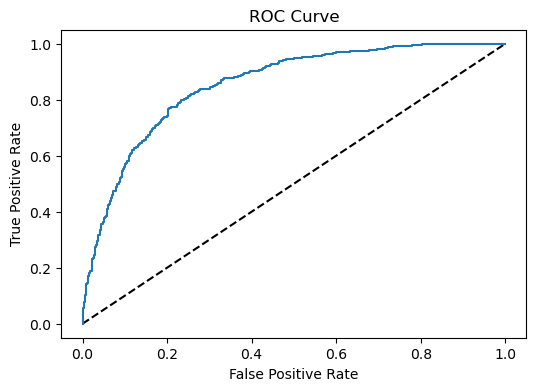

In [34]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')